In [30]:
import numpy
print(numpy.__file__)

c:\Users\main\miniforge3\Lib\site-packages\numpy\__init__.py


In [31]:
import pandas as pd
import torch 
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('insurance.csv')


x = df.drop('charges',axis=1)

y = df['charges'].values.reshape(-1,1)

label_cols = ['sex','smoker','region']


# 범주형 인코딩 까먹을 뻔 했다.
for col in label_cols:
    le = LabelEncoder()

    x[col] = le.fit_transform(x[col])

# 스케일링 필요한지는 잘모름

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

scaler1 = StandardScaler()
y_scaled = scaler1.fit_transform(y) 


# 텐서 변환 from_numpy가 왜인지 안됐음 그래서 이렇게 변환해줄거임

X_tensor = torch.tensor(X_scaled,dtype=torch.float32)
y_tensor = torch.tensor(y_scaled,dtype=torch.float32)


In [32]:
from sklearn.model_selection import train_test_split

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.3, random_state=42
)


In [33]:
import torch.nn as nn


class Linear(nn.Module):

    def __init__(self,input_dim):
            
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim,32),
            nn.ReLU(),
            nn.Linear(32,1)        
        ) 

    def forward(self,x):
        return self.model(x)
    
model = Linear(input_dim=X_train.shape[1])



In [34]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [35]:
nb_epochs = 1000
for epoch in range(nb_epochs):
    pred = model(X_train)
    loss = criterion(pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"{epoch}/{nb_epochs} epochs | loss: {loss.item():.4f}")




0/1000 epochs | loss: 1.0419
100/1000 epochs | loss: 0.1478
200/1000 epochs | loss: 0.1345
300/1000 epochs | loss: 0.1260
400/1000 epochs | loss: 0.1201
500/1000 epochs | loss: 0.1157
600/1000 epochs | loss: 0.1136
700/1000 epochs | loss: 0.1119
800/1000 epochs | loss: 0.1105
900/1000 epochs | loss: 0.1091


c:\Users\main\miniforge3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\main\miniforge3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\main\miniforge3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\main\miniforge3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\main\miniforge3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

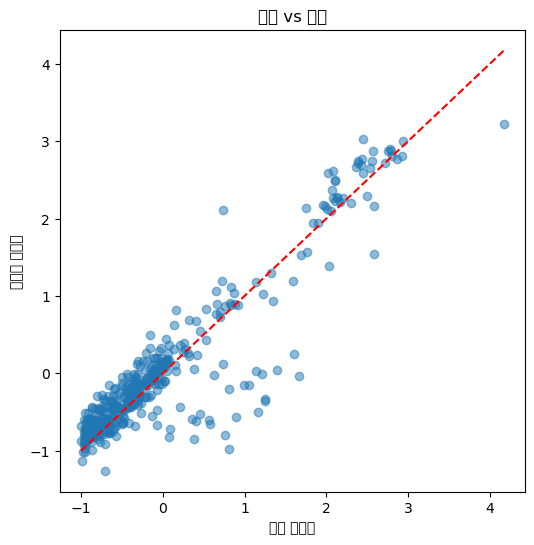

[[ 9964.495  ]
 [ 3855.5874 ]
 [29000.646  ]
 [11568.785  ]
 [31824.34   ]
 [ 3761.4233 ]
 [ 4918.8003 ]
 [17634.994  ]
 [ 5179.453  ]
 [11558.779  ]
 [16176.549  ]
 [ 7362.9316 ]
 [ 3435.6294 ]
 [46257.17   ]
 [47244.3    ]
 [46466.008  ]
 [10000.578  ]
 [44608.28   ]
 [ 9136.899  ]
 [22113.186  ]
 [ 4316.6274 ]
 [ 6573.5596 ]
 [ -508.32578]
 [ 1195.5873 ]
 [11375.437  ]
 [11743.319  ]
 [14021.117  ]
 [ 6813.6636 ]
 [10448.117  ]
 [ 2630.7563 ]
 [ 7937.321  ]
 [13572.361  ]
 [ 5909.307  ]
 [ 7606.1733 ]
 [ 5027.3257 ]
 [ 9732.129  ]
 [ 6086.595  ]
 [ 7657.501  ]
 [25868.352  ]
 [43367.438  ]
 [-1996.6783 ]
 [ 4872.6724 ]
 [14488.602  ]
 [13682.145  ]
 [ 8873.51   ]
 [15663.739  ]
 [ 9678.042  ]
 [ 5714.176  ]
 [46176.84   ]
 [ 9290.285  ]
 [15429.37   ]
 [ 3116.9263 ]
 [ 9183.26   ]
 [ 2238.0571 ]
 [13799.124  ]
 [11490.707  ]
 [ 5464.6836 ]
 [43491.44   ]
 [12259.625  ]
 [11705.971  ]
 [13623.667  ]
 [ 2194.2437 ]
 [13098.261  ]
 [ 8121.396  ]
 [10758.998  ]
 [ 7614.725  ]
 [13866.66

In [36]:
import matplotlib.pyplot as plt
# import koreanizematplotlib
# 예측
with torch.no_grad():
    y_pred = model(X_test)


y_pred_np = y_pred.flatten().numpy()
y_test_np = y_test.flatten().numpy()

# 시각화
plt.figure(figsize=(6,6))
plt.scatter(y_test_np, y_pred_np, alpha=0.5)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.xlabel('실제 보험료')
plt.ylabel('예측한 보험료')
plt.title('예측 vs 실제')
plt.show()

y_pred_inverse = scaler1.inverse_transform(y_pred.detach().numpy())

y_test_inverse = scaler1.inverse_transform(y_test.detach().numpy())

print(y_pred_inverse)

print(y_test_inverse)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 예측값과 실제값 (역정규화된 상태여야 정확하게 해석됨)
y_pred_np = y_pred_inverse.flatten()
y_test_np = y_test_inverse.flatten()

# MSE, RMSE, MAE
mse = mean_squared_error(y_test_np, y_pred_np)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_np, y_pred_np)


r2 = r2_score(y_test_np, y_pred_np)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}") 





MSE  : 22403800.00
RMSE : 4733.27
MAE  : 3014.16
R²   : 0.8472


In [38]:
train_losses = []
test_losses = []

nb_epochs = 1000
for epoch in range(nb_epochs):
    # 1. 예측 및 손실 (Train)
    model.train()
    pred_train = model(X_train)
    loss_train = criterion(pred_train, y_train)

    # 2. 역전파
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()


    model.eval()
    with torch.no_grad():
        pred_test = model(X_test)
        loss_test = criterion(pred_test, y_test)


    train_losses.append(loss_train.item())
    test_losses.append(loss_test.item())


    if epoch % 100 == 0:
        print(f"{epoch}/{nb_epochs} | Train Loss: {loss_train.item():.2f} \
              | Test Loss: {loss_test.item():.2f}")


0/1000 | Train Loss: 0.11               | Test Loss: 0.15
100/1000 | Train Loss: 0.10               | Test Loss: 0.16
200/1000 | Train Loss: 0.10               | Test Loss: 0.16
300/1000 | Train Loss: 0.10               | Test Loss: 0.16
400/1000 | Train Loss: 0.10               | Test Loss: 0.16
500/1000 | Train Loss: 0.10               | Test Loss: 0.16
600/1000 | Train Loss: 0.10               | Test Loss: 0.16
700/1000 | Train Loss: 0.10               | Test Loss: 0.16
800/1000 | Train Loss: 0.10               | Test Loss: 0.17
900/1000 | Train Loss: 0.10               | Test Loss: 0.17


**과적합을 평가하기위해서는 R제곱 점수를 보는데 train 의 스코어와 test 의 스코어를 비교하여 많이 차이의 정도에 따라 판별하고 손실함수의 수치를 보며 얼마나 잘따라오는지를 비교하면된다.**